# Project

## 1. Load the Dataframe

In [2]:
import pandas as pd

df = pd.read_csv("../data/high_diamond_ranked_10min.csv")
df = df.iloc[:,1:]
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


## 2. EDA

In [3]:
#number of data points and number of features
print(df.shape)
print(df.columns)

(9879, 39)
Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


In [4]:
print(df.dtypes)

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64
redDeaths                         int64


**Categorical Column**

In [5]:
categorical = ['blueWins', 'blueFirstBlood', 'blueEliteMonsters', 'blueHeralds','blueDragons',
               'redFirstBlood', 'redEliteMonsters', 'redHeralds','redDragons']


**Continuous Column**

In [6]:
continuous = [i for i in df.columns if i not in categorical]
print(categorical, continuous)
print(len(categorical) + len(continuous))

['blueWins', 'blueFirstBlood', 'blueEliteMonsters', 'blueHeralds', 'blueDragons', 'redFirstBlood', 'redEliteMonsters', 'redHeralds', 'redDragons'] ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
39


**Figure**

In [6]:
import matplotlib.pyplot as plt
for i in df.columns:
    plt.figure()
    if i in categorical:
        print(pd.value_counts(df[i]))
        pd.value_counts(df[i]).plot.bar()
    else:
        print(df[i].describe)
        df[i].plot.hist(bins = 50)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

0    4949
1    4930
Name: blueWins, dtype: int64


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0        28
1        12
2        15
3        43
4        75
5        18
6        18
7        16
8        16
9        13
10       20
11       33
12       18
13       14
14       15
15       17
16       14
17       43
18       21
19       11
20       14
21       13
22       17
23       78
24       33
25       17
26       18
27       19
28      105
29       18
       ... 
9849     80
9850     40
9851     15
9852     38
9853     17
9854     11
9855     15
9856     19
9857     37
9858     51
9859     36
9860     85
9861     36
9862     13
9863     16
9864     57
9865     34
9866     16
9867     14
9868     16
9869     12
9870     46
9871     12
9872     12
9873     18
9874     17
9875     54
9876     23
9877     14
9878     18
Name: blueWardsPlaced, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       2
1       1
2       0
3       1
4       4
5       0
6       3
7       2
8       3
9       1
10      3
11      2
12      1
13      3
14      3
15      1
16      1
17      3
18      4
19      3
20      3
21      1
22      2
23      4
24      3
25      1
26      1
27      3
28      5
29      5
       ..
9849    5
9850    4
9851    2
9852    6
9853    2
9854    2
9855    3
9856    1
9857    4
9858    3
9859    2
9860    3
9861    3
9862    3
9863    3
9864    3
9865    1
9866    3
9867    2
9868    4
9869    1
9870    2
9871    2
9872    0
9873    2
9874    2
9875    0
9876    1
9877    4
9878    0
Name: blueWardsDestroyed, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

1    4987
0    4892
Name: blueFirstBlood, dtype: int64


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0        9
1        5
2        7
3        4
4        6
5        5
6        7
7        5
8        7
9        4
10       4
11      11
12       7
13       4
14       4
15       3
16      10
17       3
18       5
19       5
20      11
21       4
22       4
23       4
24       6
25       4
26       8
27       7
28       8
29       3
        ..
9849     6
9850     4
9851     4
9852     6
9853     7
9854     6
9855     2
9856    10
9857     5
9858     3
9859     9
9860     8
9861     4
9862     6
9863     5
9864     5
9865     4
9866     1
9867     1
9868     7
9869     9
9870     5
9871     4
9872     7
9873    12
9874     7
9875     6
9876     6
9877     2
9878     6
Name: blueKills, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0        6
1        5
2       11
3        5
4        6
5        3
6        6
7       13
8        7
9        5
10       4
11      11
12       1
13       9
14       4
15       7
16       2
17       7
18       4
19       9
20       6
21      13
22       6
23       3
24       9
25       8
26       6
27       4
28       6
29       8
        ..
9849     7
9850     1
9851     8
9852     6
9853     8
9854     6
9855     7
9856     2
9857     7
9858     6
9859     4
9860     7
9861    13
9862     4
9863     7
9864     4
9865     7
9866     2
9867     3
9868     1
9869    12
9870     3
9871     5
9872     7
9873     6
9874     4
9875     4
9876     7
9877     3
9878     6
Name: blueDeaths, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       11
1        5
2        4
3        5
4        6
5        6
6        7
7        3
8        8
9        5
10       6
11       7
12      11
13       1
14       4
15       3
16       8
17       3
18      11
19       5
20      15
21       5
22       3
23       4
24      10
25       4
26       9
27       9
28      13
29       2
        ..
9849     3
9850    13
9851     2
9852     9
9853     9
9854     7
9855     3
9856    12
9857     6
9858     7
9859    11
9860    11
9861     5
9862    10
9863     6
9864     5
9865     1
9866     0
9867     0
9868     5
9869    12
9870     2
9871     5
9872     9
9873    13
9874     5
9875     8
9876     5
9877     3
9878     5
Name: blueAssists, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

0    5156
1    4013
2     710
Name: blueEliteMonsters, dtype: int64


<Figure size 640x480 with 1 Axes>

0    6303
1    3576
Name: blueDragons, dtype: int64


<Figure size 640x480 with 1 Axes>

0    8022
1    1857
Name: blueHeralds, dtype: int64


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9849    0
9850    0
9851    0
9852    0
9853    0
9854    0
9855    0
9856    0
9857    0
9858    0
9859    0
9860    0
9861    0
9862    0
9863    2
9864    0
9865    0
9866    0
9867    0
9868    0
9869    0
9870    0
9871    0
9872    0
9873    0
9874    0
9875    0
9876    0
9877    0
9878    0
Name: blueTowersDestroyed, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       17210
1       14712
2       16113
3       15157
4       16400
5       15899
6       16874
7       15305
8       16401
9       15057
10      15474
11      16695
12      17865
13      14979
14      15722
15      15015
16      19733
17      14852
18      16282
19      14994
20      18606
21      15878
22      15773
23      15906
24      16515
25      15415
26      17178
27      17226
28      17474
29      14905
        ...  
9849    15894
9850    16047
9851    14709
9852    16368
9853    17394
9854    15950
9855    15268
9856    18274
9857    15993
9858    14857
9859    18503
9860    17442
9861    14478
9862    17086
9863    18075
9864    15965
9865    15261
9866    14603
9867    13836
9868    17170
9869    16198
9870    16923
9871    15131
9872    17155
9873    18573
9874    17765
9875    16238
9876    15903
9877    14459
9878    16266
Name: blueTotalGold, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       6.6
1       6.6
2       6.4
3       7.0
4       7.0
5       7.0
6       6.8
7       6.4
8       7.2
9       6.8
10      6.6
11      7.0
12      7.4
13      6.6
14      6.8
15      6.8
16      7.6
17      6.8
18      6.8
19      7.0
20      7.2
21      6.8
22      7.0
23      6.8
24      6.8
25      6.2
26      7.0
27      7.0
28      6.8
29      6.8
       ... 
9849    7.0
9850    7.0
9851    6.6
9852    7.0
9853    6.8
9854    6.8
9855    6.8
9856    6.8
9857    6.8
9858    6.8
9859    7.4
9860    7.2
9861    6.2
9862    7.0
9863    7.2
9864    7.0
9865    7.0
9866    7.0
9867    6.6
9868    7.0
9869    7.0
9870    7.2
9871    6.8
9872    7.0
9873    7.2
9874    7.2
9875    7.2
9876    7.0
9877    6.6
9878    7.0
Name: blueAvgLevel, Length: 9879, dtype: float64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       17039
1       16265
2       16221
3       17954
4       18543
5       18161
6       16967
7       16138
8       18527
9       16805
10      16611
11      18507
12      19102
13      17213
14      17896
15      16974
16      20862
17      16888
18      17378
19      17924
20      19254
21      16945
22      17562
23      19219
24      17223
25      16047
26      17854
27      18982
28      17436
29      17974
        ...  
9849    17808
9850    18644
9851    17092
9852    17821
9853    17904
9854    17303
9855    17717
9856    19011
9857    17528
9858    16510
9859    19717
9860    20005
9861    14665
9862    17746
9863    19324
9864    18534
9865    18671
9866    18478
9867    17114
9868    19211
9869    18249
9870    19758
9871    18216
9872    18002
9873    19391
9874    18967
9875    19255
9876    18032
9877    17229
9878    17321
Name: blueTotalExperience, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       195
1       174
2       186
3       201
4       210
5       225
6       225
7       209
8       189
9       220
10      231
11      157
12      238
13      210
14      224
15      209
16      263
17      203
18      213
19      188
20      214
21      203
22      238
23      238
24      208
25      204
26      209
27      228
28      217
29      233
       ... 
9849    212
9850    244
9851    217
9852    234
9853    261
9854    196
9855    214
9856    232
9857    206
9858    226
9859    250
9860    210
9861    171
9862    229
9863    233
9864    208
9865    223
9866    232
9867    213
9868    251
9869    165
9870    222
9871    214
9872    231
9873    207
9874    211
9875    233
9876    210
9877    224
9878    207
Name: blueTotalMinionsKilled, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       36
1       43
2       46
3       55
4       57
5       42
6       53
7       48
8       61
9       39
10      28
11      40
12      53
13      52
14      51
15      53
16      56
17      54
18      49
19      48
20      45
21      43
22      56
23      67
24      45
25      44
26      44
27      61
28      53
29      52
        ..
9849    52
9850    48
9851    38
9852    47
9853    32
9854    55
9855    72
9856    49
9857    48
9858    43
9859    56
9860    68
9861    32
9862    54
9863    60
9864    52
9865    60
9866    71
9867    59
9868    54
9869    33
9870    72
9871    61
9872    36
9873    46
9874    69
9875    48
9876    45
9877    48
9878    44
Name: blueTotalJungleMinionsKilled, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0        643
1      -2908
2      -1172
3      -1321
4      -1004
5        698
6       2411
7      -2615
8      -1979
9      -1548
10       331
11     -1505
12      3274
13     -3414
14      -470
15     -1996
16      5228
17     -1975
18       882
19     -3155
20      2526
21     -2835
22     -1254
23       406
24     -1020
25     -2472
26      1260
27      1857
28      1320
29     -3282
        ... 
9849   -1019
9850    1976
9851   -2591
9852   -1314
9853     188
9854     175
9855    -880
9856    4693
9857    -645
9858    -959
9859    2527
9860    -347
9861   -5087
9862    1838
9863     600
9864     725
9865   -1461
9866     670
9867   -1798
9868    3234
9869   -2121
9870    1974
9871    -727
9872     756
9873    2639
9874    2519
9875     782
9876   -2416
9877    -839
9878     927
Name: blueGoldDiff, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0         -8
1      -1173
2      -1033
3         -7
4        230
5        101
6       1563
7       -800
8       -771
9      -1574
10     -1585
11      -635
12      1659
13     -1141
14      -187
15     -1804
16      3378
17     -1345
18       512
19     -2773
20      1625
21     -2821
22      -567
23      1283
24       493
25     -1067
26       -55
27      2015
28      -413
29     -1647
        ... 
9849   -1564
9850    1778
9851   -1250
9852   -1708
9853    -676
9854    -234
9855     179
9856    2968
9857    -448
9858   -1248
9859    1695
9860     966
9861   -4618
9862    -689
9863     289
9864    1773
9865     -69
9866    1446
9867    -674
9868    2427
9869   -1038
9870    1712
9871     343
9872       1
9873    2364
9874    2469
9875     888
9876   -1877
9877   -1085
9878     -58
Name: blueExperienceDiff, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       19.5
1       17.4
2       18.6
3       20.1
4       21.0
5       22.5
6       22.5
7       20.9
8       18.9
9       22.0
10      23.1
11      15.7
12      23.8
13      21.0
14      22.4
15      20.9
16      26.3
17      20.3
18      21.3
19      18.8
20      21.4
21      20.3
22      23.8
23      23.8
24      20.8
25      20.4
26      20.9
27      22.8
28      21.7
29      23.3
        ... 
9849    21.2
9850    24.4
9851    21.7
9852    23.4
9853    26.1
9854    19.6
9855    21.4
9856    23.2
9857    20.6
9858    22.6
9859    25.0
9860    21.0
9861    17.1
9862    22.9
9863    23.3
9864    20.8
9865    22.3
9866    23.2
9867    21.3
9868    25.1
9869    16.5
9870    22.2
9871    21.4
9872    23.1
9873    20.7
9874    21.1
9875    23.3
9876    21.0
9877    22.4
9878    20.7
Name: blueCSPerMin, Length: 9879, dtype: float64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       1721.0
1       1471.2
2       1611.3
3       1515.7
4       1640.0
5       1589.9
6       1687.4
7       1530.5
8       1640.1
9       1505.7
10      1547.4
11      1669.5
12      1786.5
13      1497.9
14      1572.2
15      1501.5
16      1973.3
17      1485.2
18      1628.2
19      1499.4
20      1860.6
21      1587.8
22      1577.3
23      1590.6
24      1651.5
25      1541.5
26      1717.8
27      1722.6
28      1747.4
29      1490.5
         ...  
9849    1589.4
9850    1604.7
9851    1470.9
9852    1636.8
9853    1739.4
9854    1595.0
9855    1526.8
9856    1827.4
9857    1599.3
9858    1485.7
9859    1850.3
9860    1744.2
9861    1447.8
9862    1708.6
9863    1807.5
9864    1596.5
9865    1526.1
9866    1460.3
9867    1383.6
9868    1717.0
9869    1619.8
9870    1692.3
9871    1513.1
9872    1715.5
9873    1857.3
9874    1776.5
9875    1623.8
9876    1590.3
9877    1445.9
9878    1626.6
Name: blueGoldPerMin, Length: 9879, dtype: float64>

<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0        15
1        12
2        15
3        15
4        17
5        36
6        57
7        15
8        15
9        16
10       15
11       17
12       12
13       20
14      102
15       18
16       13
17       17
18       19
19       15
20       12
21       15
22       16
23       15
24       18
25       19
26       10
27       14
28       65
29       18
       ... 
9849     23
9850     13
9851     13
9852     17
9853     29
9854     84
9855     18
9856     16
9857     19
9858     29
9859     26
9860     13
9861     40
9862     14
9863     37
9864     16
9865     15
9866     38
9867     14
9868     21
9869     13
9870     11
9871     17
9872     60
9873     16
9874     46
9875     12
9876     14
9877     66
9878      9
Name: redWardsPlaced, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0        6
1        1
2        3
3        2
4        2
5        5
6        1
7        0
8        2
9        2
10       2
11       1
12       1
13       3
14       1
15       3
16       2
17      14
18       3
19       1
20       2
21       3
22       3
23       3
24       3
25       2
26       3
27       4
28       3
29       3
        ..
9849     7
9850     6
9851     3
9852     6
9853     4
9854     2
9855     0
9856     1
9857     5
9858     3
9859    16
9860     1
9861     3
9862     3
9863     4
9864     3
9865     0
9866     3
9867     3
9868     2
9869     3
9870     0
9871     4
9872     3
9873     6
9874     3
9875    21
9876     0
9877     4
9878     2
Name: redWardsDestroyed, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

0    4987
1    4892
Name: redFirstBlood, dtype: int64


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0        6
1        5
2       11
3        5
4        6
5        3
6        6
7       13
8        7
9        5
10       4
11      11
12       1
13       9
14       4
15       7
16       2
17       7
18       4
19       9
20       6
21      13
22       6
23       3
24       9
25       8
26       6
27       4
28       6
29       8
        ..
9849     7
9850     1
9851     8
9852     6
9853     8
9854     6
9855     7
9856     2
9857     7
9858     6
9859     4
9860     7
9861    13
9862     4
9863     7
9864     4
9865     7
9866     2
9867     3
9868     1
9869    12
9870     3
9871     5
9872     7
9873     6
9874     4
9875     4
9876     7
9877     3
9878     6
Name: redKills, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0        9
1        5
2        7
3        4
4        6
5        5
6        7
7        5
8        7
9        4
10       4
11      11
12       7
13       4
14       4
15       3
16      10
17       3
18       5
19       5
20      11
21       4
22       4
23       4
24       6
25       4
26       8
27       7
28       8
29       3
        ..
9849     6
9850     4
9851     4
9852     6
9853     7
9854     6
9855     2
9856    10
9857     5
9858     3
9859     9
9860     8
9861     4
9862     6
9863     5
9864     5
9865     4
9866     1
9867     1
9868     7
9869     9
9870     5
9871     4
9872     7
9873    12
9874     7
9875     6
9876     6
9877     2
9878     6
Name: redDeaths, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0        8
1        2
2       14
3       10
4        7
5        2
6        9
7       11
8        5
9        4
10       5
11       9
12       1
13      11
14       3
15      13
16       2
17       6
18       3
19       9
20       4
21      14
22      10
23       3
24      13
25      13
26       3
27       2
28      11
29      12
        ..
9849     4
9850     1
9851    10
9852     4
9853     7
9854     4
9855     8
9856     1
9857     9
9858     3
9859     9
9860    10
9861    12
9862     7
9863     6
9864     5
9865     8
9866     5
9867     4
9868     1
9869     7
9870     5
9871     2
9872     8
9873     6
9874     7
9875     3
9876    11
9877     1
9878     4
Name: redAssists, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

0    4947
1    4202
2     730
Name: redEliteMonsters, dtype: int64


<Figure size 640x480 with 1 Axes>

0    5798
1    4081
Name: redDragons, dtype: int64


<Figure size 640x480 with 1 Axes>

0    8298
1    1581
Name: redHeralds, dtype: int64


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       0
1       1
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9849    0
9850    0
9851    0
9852    0
9853    0
9854    0
9855    0
9856    0
9857    0
9858    0
9859    0
9860    0
9861    0
9862    0
9863    0
9864    0
9865    0
9866    0
9867    0
9868    0
9869    0
9870    0
9871    0
9872    0
9873    0
9874    0
9875    0
9876    0
9877    0
9878    0
Name: redTowersDestroyed, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       16567
1       17620
2       17285
3       16478
4       17404
5       15201
6       14463
7       17920
8       18380
9       16605
10      15143
11      18200
12      14591
13      18393
14      16192
15      17011
16      14505
17      16827
18      15400
19      18149
20      16080
21      18713
22      17027
23      15500
24      17535
25      17887
26      15918
27      15369
28      16154
29      18187
        ...  
9849    16913
9850    14071
9851    17300
9852    17682
9853    17206
9854    15775
9855    16148
9856    13581
9857    16638
9858    15816
9859    15976
9860    17789
9861    19565
9862    15248
9863    17475
9864    15240
9865    16722
9866    13933
9867    15634
9868    13936
9869    18319
9870    14949
9871    15858
9872    16399
9873    15934
9874    15246
9875    15456
9876    18319
9877    15298
9878    15339
Name: redTotalGold, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       6.8
1       6.8
2       6.8
3       7.0
4       7.0
5       7.0
6       6.4
7       6.6
8       7.2
9       6.8
10      7.2
11      7.0
12      6.8
13      7.2
14      7.0
15      7.2
16      6.8
17      6.8
18      6.6
19      7.4
20      7.0
21      7.2
22      7.0
23      7.0
24      6.6
25      7.0
26      6.8
27      6.6
28      6.8
29      7.4
       ... 
9849    7.2
9850    6.8
9851    7.2
9852    7.2
9853    7.0
9854    6.8
9855    6.6
9856    6.4
9857    6.8
9858    6.8
9859    7.0
9860    7.2
9861    7.2
9862    7.2
9863    7.0
9864    6.8
9865    7.0
9866    6.8
9867    6.8
9868    6.8
9869    7.4
9870    6.8
9871    6.8
9872    7.0
9873    6.6
9874    6.8
9875    7.0
9876    7.4
9877    7.2
9878    6.8
Name: redAvgLevel, Length: 9879, dtype: float64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       17047
1       17438
2       17254
3       17961
4       18313
5       18060
6       15404
7       16938
8       19298
9       18379
10      18196
11      19142
12      17443
13      18354
14      18083
15      18778
16      17484
17      18233
18      16866
19      20697
20      17629
21      19766
22      18129
23      17936
24      16730
25      17114
26      17909
27      16967
28      17849
29      19621
        ...  
9849    19372
9850    16866
9851    18342
9852    19529
9853    18580
9854    17537
9855    17538
9856    16043
9857    17976
9858    17758
9859    18022
9860    19039
9861    19283
9862    18435
9863    19035
9864    16761
9865    18740
9866    17032
9867    17788
9868    16784
9869    19287
9870    18046
9871    17873
9872    18001
9873    17027
9874    16498
9875    18367
9876    19909
9877    18314
9878    17379
Name: redTotalExperience, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       197
1       240
2       203
3       235
4       225
5       221
6       164
7       157
8       240
9       247
10      216
11      188
12      240
13      229
14      242
15      237
16      210
17      218
18      228
19      219
20      225
21      209
22      231
23      220
24      197
25      221
26      233
27      202
28      223
29      225
       ... 
9849    229
9850    222
9851    236
9852    230
9853    212
9854    221
9855    198
9856    179
9857    197
9858    195
9859    210
9860    218
9861    199
9862    231
9863    224
9864    202
9865    215
9866    197
9867    251
9868    203
9869    187
9870    202
9871    248
9872    216
9873    197
9874    229
9875    206
9876    261
9877    247
9878    201
Name: redTotalMinionsKilled, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       55
1       52
2       28
3       47
4       67
5       59
6       35
7       54
8       53
9       43
10      51
11      52
12      50
13      51
14      48
15      51
16      64
17      53
18      52
19      56
20      48
21      45
22      60
23      64
24      36
25      36
26      36
27      49
28      40
29      52
        ..
9849    44
9850    44
9851    55
9852    76
9853    56
9854    28
9855    42
9856    45
9857    64
9858    58
9859    63
9860    58
9861    71
9862    51
9863    63
9864    40
9865    56
9866    52
9867    46
9868    68
9869    68
9870    64
9871    48
9872    58
9873    38
9874    34
9875    56
9876    60
9877    40
9878    46
Name: redTotalJungleMinionsKilled, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       -643
1       2908
2       1172
3       1321
4       1004
5       -698
6      -2411
7       2615
8       1979
9       1548
10      -331
11      1505
12     -3274
13      3414
14       470
15      1996
16     -5228
17      1975
18      -882
19      3155
20     -2526
21      2835
22      1254
23      -406
24      1020
25      2472
26     -1260
27     -1857
28     -1320
29      3282
        ... 
9849    1019
9850   -1976
9851    2591
9852    1314
9853    -188
9854    -175
9855     880
9856   -4693
9857     645
9858     959
9859   -2527
9860     347
9861    5087
9862   -1838
9863    -600
9864    -725
9865    1461
9866    -670
9867    1798
9868   -3234
9869    2121
9870   -1974
9871     727
9872    -756
9873   -2639
9874   -2519
9875    -782
9876    2416
9877     839
9878    -927
Name: redGoldDiff, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0          8
1       1173
2       1033
3          7
4       -230
5       -101
6      -1563
7        800
8        771
9       1574
10      1585
11       635
12     -1659
13      1141
14       187
15      1804
16     -3378
17      1345
18      -512
19      2773
20     -1625
21      2821
22       567
23     -1283
24      -493
25      1067
26        55
27     -2015
28       413
29      1647
        ... 
9849    1564
9850   -1778
9851    1250
9852    1708
9853     676
9854     234
9855    -179
9856   -2968
9857     448
9858    1248
9859   -1695
9860    -966
9861    4618
9862     689
9863    -289
9864   -1773
9865      69
9866   -1446
9867     674
9868   -2427
9869    1038
9870   -1712
9871    -343
9872      -1
9873   -2364
9874   -2469
9875    -888
9876    1877
9877    1085
9878      58
Name: redExperienceDiff, Length: 9879, dtype: int64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       19.7
1       24.0
2       20.3
3       23.5
4       22.5
5       22.1
6       16.4
7       15.7
8       24.0
9       24.7
10      21.6
11      18.8
12      24.0
13      22.9
14      24.2
15      23.7
16      21.0
17      21.8
18      22.8
19      21.9
20      22.5
21      20.9
22      23.1
23      22.0
24      19.7
25      22.1
26      23.3
27      20.2
28      22.3
29      22.5
        ... 
9849    22.9
9850    22.2
9851    23.6
9852    23.0
9853    21.2
9854    22.1
9855    19.8
9856    17.9
9857    19.7
9858    19.5
9859    21.0
9860    21.8
9861    19.9
9862    23.1
9863    22.4
9864    20.2
9865    21.5
9866    19.7
9867    25.1
9868    20.3
9869    18.7
9870    20.2
9871    24.8
9872    21.6
9873    19.7
9874    22.9
9875    20.6
9876    26.1
9877    24.7
9878    20.1
Name: redCSPerMin, Length: 9879, dtype: float64>


<Figure size 640x480 with 1 Axes>

<bound method NDFrame.describe of 0       1656.7
1       1762.0
2       1728.5
3       1647.8
4       1740.4
5       1520.1
6       1446.3
7       1792.0
8       1838.0
9       1660.5
10      1514.3
11      1820.0
12      1459.1
13      1839.3
14      1619.2
15      1701.1
16      1450.5
17      1682.7
18      1540.0
19      1814.9
20      1608.0
21      1871.3
22      1702.7
23      1550.0
24      1753.5
25      1788.7
26      1591.8
27      1536.9
28      1615.4
29      1818.7
         ...  
9849    1691.3
9850    1407.1
9851    1730.0
9852    1768.2
9853    1720.6
9854    1577.5
9855    1614.8
9856    1358.1
9857    1663.8
9858    1581.6
9859    1597.6
9860    1778.9
9861    1956.5
9862    1524.8
9863    1747.5
9864    1524.0
9865    1672.2
9866    1393.3
9867    1563.4
9868    1393.6
9869    1831.9
9870    1494.9
9871    1585.8
9872    1639.9
9873    1593.4
9874    1524.6
9875    1545.6
9876    1831.9
9877    1529.8
9878    1533.9
Name: redGoldPerMin, Length: 9879, dtype: float64>


<Figure size 640x480 with 1 Axes>

In [7]:
total_blue_gold_categorical = []
threshold = 16500
for i in df['blueTotalGold']:
    if i > threshold:
        total_blue_gold_categorical.append("bluetotalgold > 16500")
    else:
        total_blue_gold_categorical.append("bluetotalgold <= 16500")
df['blue_total_gold_categorical'] = total_blue_gold_categorical

In [8]:
total_blue_experience_categorical = []
threshold = 17500
for i in df['blueTotalExperience']:
    if i > threshold:
        total_blue_experience_categorical.append("blueTotalExperience > 17500")
    else:
        total_blue_experience_categorical.append("blueTotalExperience <= 17500")
df['blue_total_experience_categorical'] = total_blue_experience_categorical

In [9]:
wins = []
for i in df['blueWins']:
    if i == 0:
        wins.append("Red Wins")
    else:
        wins.append("Blue Wins")
df['wins'] = wins

**Scatter Plot: Continuous vs. Continuous**

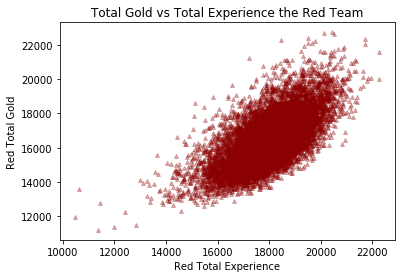

In [10]:
plt.scatter(df['redTotalExperience'], df['redTotalGold'], marker = '^', s = 15, c = 'darkred', alpha = 0.3)
plt.ylabel('Red Total Gold')
plt.xlabel('Red Total Experience')
plt.title('Total Gold vs Total Experience the Red Team')
plt.savefig("../figures/scatter1.png", bbox_inches='tight')

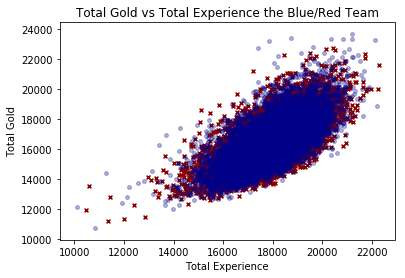

In [11]:
plt.scatter(df['redTotalExperience'], df['redTotalGold'], marker = 'x', s = 15, c = 'darkred', alpha = 1)
plt.scatter(df['blueTotalExperience'], df['blueTotalGold'], marker = 'o', s = 15, c = 'darkblue', alpha = 0.3)

plt.ylabel('Total Gold')
plt.xlabel('Total Experience')
plt.title('Total Gold vs Total Experience the Blue/Red Team')
plt.savefig("../figures/scatter2.png", bbox_inches='tight')

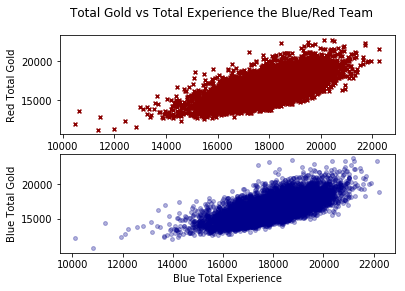

In [12]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Total Gold vs Total Experience the Blue/Red Team')
ax1.scatter(df['redTotalExperience'], df['redTotalGold'], marker = 'x', s = 15, c = 'darkred', alpha = 1)
ax1.set(ylabel = 'Red Total Gold', xlabel = "Red Total Experience")
ax2.scatter(df['blueTotalExperience'], df['blueTotalGold'], marker = 'o', s = 15, c = 'darkblue', alpha = 0.3)
ax2.set(ylabel = 'Blue Total Gold', xlabel = "Blue Total Experience")
plt.savefig("../figures/scatter3.png", bbox_inches='tight')

**Heatmap Plot: Continuous vs. Continuous**

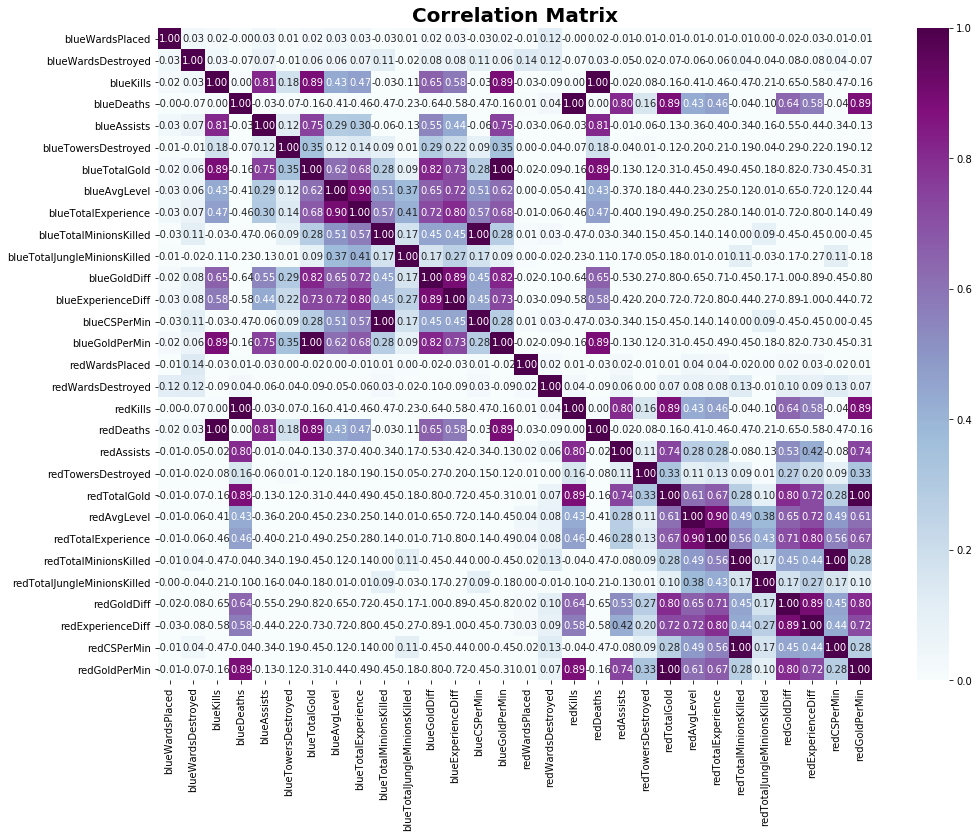

In [13]:
import seaborn as sns
plt.figure(figsize=(16, 12))
sns.heatmap(df[continuous].corr(), cmap='BuPu', annot=True, fmt='.2f', vmin=0);
plt.savefig("../figures/heatmap.png")
plt.title('Correlation Matrix', fontsize = 20, fontweight = 'bold')
plt.savefig("../figures/heatmap_ppt.png", bbox_inches='tight')
plt.show()

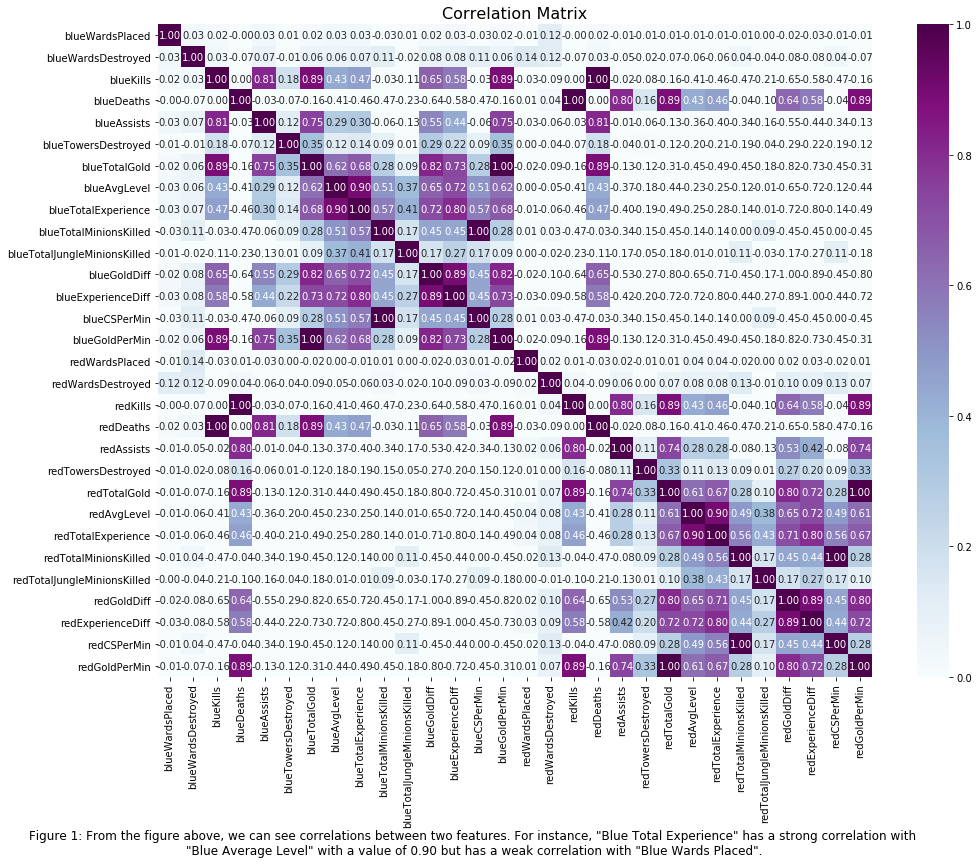

In [14]:
import seaborn as sns
plt.figure(figsize=(16, 12))
sns.heatmap(df[continuous].corr(), cmap='BuPu', annot=True, fmt='.2f', vmin=0);
plt.savefig("../figures/heatmap.png")
txt = '''Figure 1: From the figure above, we can see correlations between two features. For instance, "Blue Total Experience" has a strong correlation with 
"Blue Average Level" with a value of 0.90 but has a weak correlation with "Blue Wards Placed".'''
plt.figtext(0.4, -0.08, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.title('Correlation Matrix', fontsize = 16)
plt.savefig("../figures/heatmap.png", bbox_inches='tight')
plt.show()

**Stacked Bar Plot: Categorical vs. Categorical**

In [15]:
print(continuous)

['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']


wins         Blue Wins  Red Wins
blueDragons                     
0             0.418531  0.581469
1             0.640940  0.359060


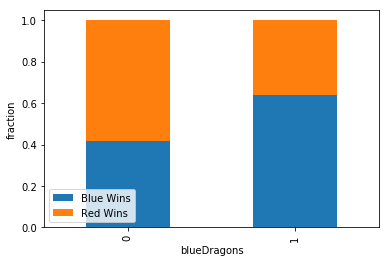

In [16]:
count_matrix = df.groupby(['blueDragons', 'wins']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
print(count_matrix_norm)
count_matrix_norm.plot(kind = 'bar', stacked = True)
plt.ylabel('fraction')
plt.legend(loc = 3)
plt.savefig("../figures/stackedbarplot_blueDragon.png", bbox_inches='tight')
plt.show()

wins         Blue Wins  Red Wins
blueHeralds                     
0             0.476814  0.523186
1             0.595046  0.404954


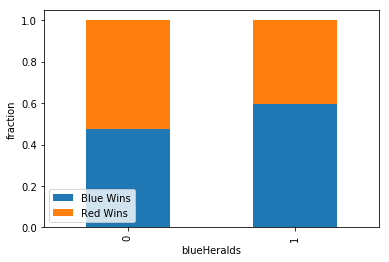

In [17]:
count_matrix = df.groupby(['blueHeralds', 'wins']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
count_matrix_norm.plot(kind = 'bar', stacked = True)
print(count_matrix_norm)
plt.ylabel('fraction')
plt.legend(loc = 3)
plt.savefig("../figures/stackedbarplot_blueHeralds.png", bbox_inches='tight')
plt.show()

wins            Blue Wins  Red Wins
blueFirstBlood                     
0                0.397179  0.602821
1                0.598957  0.401043


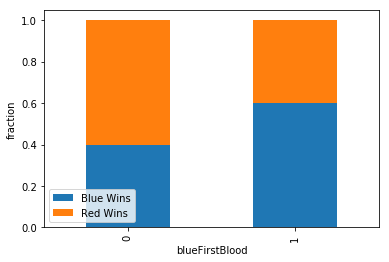

In [18]:
count_matrix = df.groupby(['blueFirstBlood', 'wins']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
count_matrix_norm.plot(kind = 'bar', stacked = True)
print(count_matrix_norm)
plt.ylabel('fraction')
plt.legend(loc = 3)
plt.savefig("../figures/stackedbarplot_blueFirstBlood.png", bbox_inches='tight')
plt.show()

wins                 Blue Wins  Red Wins
blueTowersDestroyed                     
0                     0.486458  0.513542
1                     0.736597  0.263403
2                     0.962963  0.037037
3                     1.000000       NaN
4                     1.000000       NaN


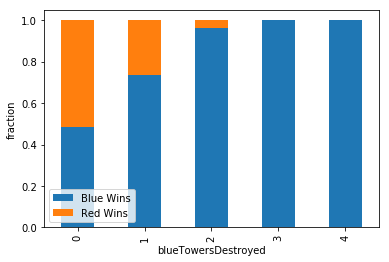

In [19]:
count_matrix = df.groupby(['blueTowersDestroyed', 'wins']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
count_matrix_norm.plot(kind = 'bar', stacked = True)
print(count_matrix_norm)
plt.ylabel('fraction')
plt.legend(loc = 3)
plt.savefig("../figures/stackedbarplot_blueTowersDestroyed.png", bbox_inches='tight')
plt.show()

In [20]:
count_matrix = df.groupby(['blueDragons', 'blue_total_gold_categorical']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
print(count_matrix_norm)

blue_total_gold_categorical  bluetotalgold <= 16500  bluetotalgold > 16500
blueDragons                                                               
0                                              3678                   2625
1                                              1524                   2052
blue_total_gold_categorical  bluetotalgold <= 16500  bluetotalgold > 16500
blueDragons                                                               
0                                          0.583532               0.416468
1                                          0.426174               0.573826


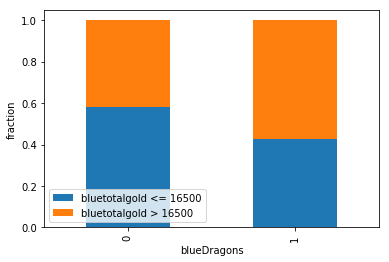

In [21]:
count_matrix_norm.plot(kind = 'bar', stacked = True)
plt.ylabel('fraction')
plt.legend(loc = 3)
plt.savefig("../figures/stackedbarplot1.png", bbox_inches='tight')
plt.show()

In [22]:
total_blue_experience_categorical = []
threshold = 17500
for i in df['blueTotalExperience']:
    if i > threshold:
        total_blue_experience_categorical.append("blueTotalExperience > 17500")
    else:
        total_blue_experience_categorical.append("blueTotalExperience <= 17500")
df['blue_total_experience_categorical'] = total_blue_experience_categorical

wins = []
for i in df['blueWins']:
    if i == 0:
        wins.append("Red Wins")
    else:
        wins.append("Blue Wins")
df['wins'] = wins

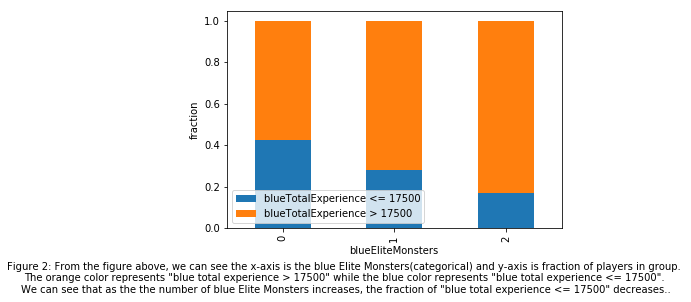

In [23]:
count_matrix = df.groupby(['blueEliteMonsters', 'blue_total_experience_categorical']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)

count_matrix_norm.plot(kind = 'bar', stacked = True)
plt.ylabel('fraction')
plt.legend(loc = 3)
txt = '''Figure 2: From the figure above, we can see the x-axis is the blue Elite Monsters(categorical) and y-axis is fraction of players in group. 
The orange color represents "blue total experience > 17500" while the blue color represents "blue total experience <= 17500". 
We can see that as the the number of blue Elite Monsters increases, the fraction of "blue total experience <= 17500" decreases..'''
plt.figtext(0.4, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 10)
plt.savefig("../figures/stackedbarplot2.png", bbox_inches='tight')
plt.show()

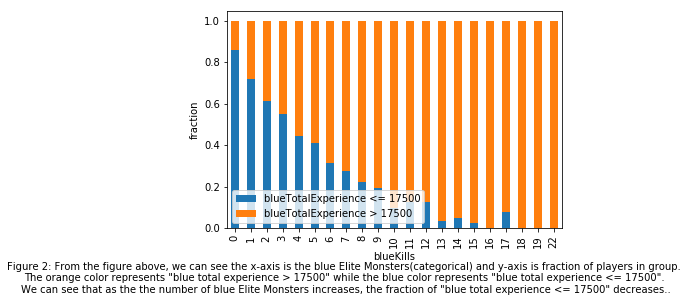

In [24]:
count_matrix = df.groupby(['blueKills', 'blue_total_experience_categorical']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)

count_matrix_norm.plot(kind = 'bar', stacked = True)
plt.ylabel('fraction')
plt.legend(loc = 3)
txt = '''Figure 2: From the figure above, we can see the x-axis is the blue Elite Monsters(categorical) and y-axis is fraction of players in group. 
The orange color represents "blue total experience > 17500" while the blue color represents "blue total experience <= 17500". 
We can see that as the the number of blue Elite Monsters increases, the fraction of "blue total experience <= 17500" decreases..'''
plt.figtext(0.4, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 10)
plt.savefig("../figures/stackedbarplot2.png", bbox_inches='tight')
plt.show()

**Category-specific histogram: Continuous vs. Categorical**

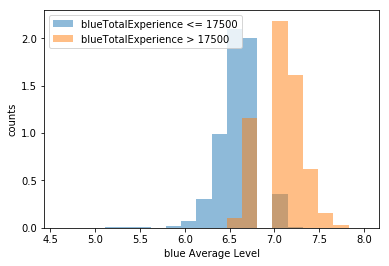

In [25]:
bin_range = (df['blueAvgLevel'].min(),df['blueAvgLevel'].max())
categories = df['blue_total_experience_categorical'].unique()

for c in categories:
    plt.hist(df[df['blue_total_experience_categorical']==c]['blueAvgLevel'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('counts')
plt.xlabel('blue Average Level')

plt.savefig("../figures/histogram1.png", bbox_inches='tight')
plt.show()

In [26]:
total_blue_gold_categorical = []
threshold = 16500
for i in df['blueTotalGold']:
    if i > threshold:
        total_blue_gold_categorical.append("bluetotalgold > 16500")
    else:
        total_blue_gold_categorical.append("bluetotalgold <= 16500")
df['blue_total_gold_categorical'] = total_blue_gold_categorical

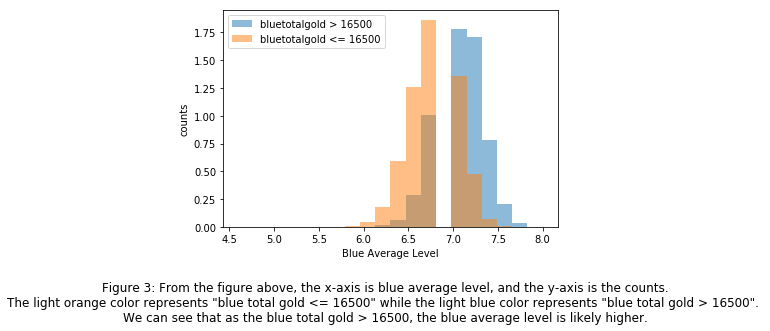

In [27]:
bin_range = (df['blueAvgLevel'].min(),df['blueAvgLevel'].max())
categories = df['blue_total_gold_categorical'].unique()

for c in categories:
    plt.hist(df[df['blue_total_gold_categorical']==c]['blueAvgLevel'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    
plt.legend()
plt.ylabel('counts')
plt.xlabel('Blue Average Level')
txt = '''Figure 3: From the figure above, the x-axis is blue average level, and the y-axis is the counts.
The light orange color represents "blue total gold <= 16500" while the light blue color represents "blue total gold > 16500". 
We can see that as the blue total gold > 16500, the blue average level is likely higher.'''
plt.figtext(0.5, -0.20, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig("../figures/histogram2.png", bbox_inches='tight')

plt.show()

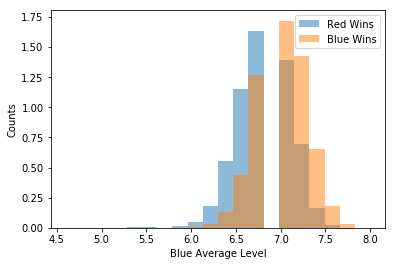

In [28]:
bin_range = (df['blueAvgLevel'].min(),df['blueAvgLevel'].max())
categories = df['wins'].unique()

for c in categories:
    plt.hist(df[df['wins']==c]['blueAvgLevel'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Counts')
plt.xlabel('Blue Average Level')

plt.savefig("../figures/histogram3.png", bbox_inches='tight')
plt.show()

**Box Plot: Continuous vs. Categorical**

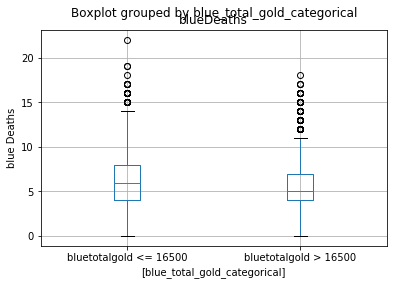

In [29]:
df[['blueDeaths','blue_total_gold_categorical']].boxplot(by='blue_total_gold_categorical')
plt.ylabel('blue Deaths')

plt.savefig("../figures/Boxplot1.png", bbox_inches='tight')

plt.show()

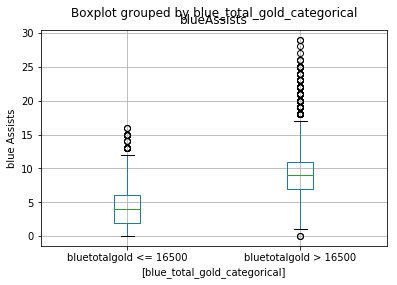

In [30]:
df[['blueAssists','blue_total_gold_categorical']].boxplot(by='blue_total_gold_categorical')
plt.ylabel('blue Assists')
plt.savefig("../figures/Boxplot2.png", bbox_inches='tight')
plt.show()

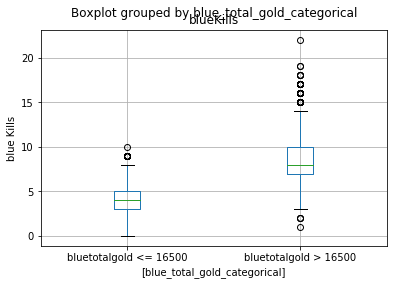

In [31]:
df[['blueKills','blue_total_gold_categorical']].boxplot(by='blue_total_gold_categorical')

plt.ylabel('blue Kills')
plt.savefig("../figures/Boxplot3.png", bbox_inches='tight')

plt.show()

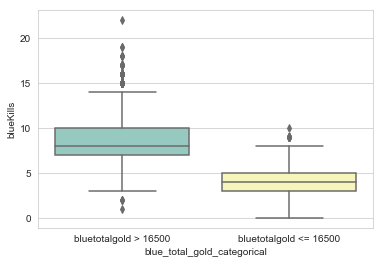

In [32]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='blue_total_gold_categorical',y='blueKills',data=df, palette="Set3")

plt.savefig("../figures/Boxplot3.png", bbox_inches='tight')


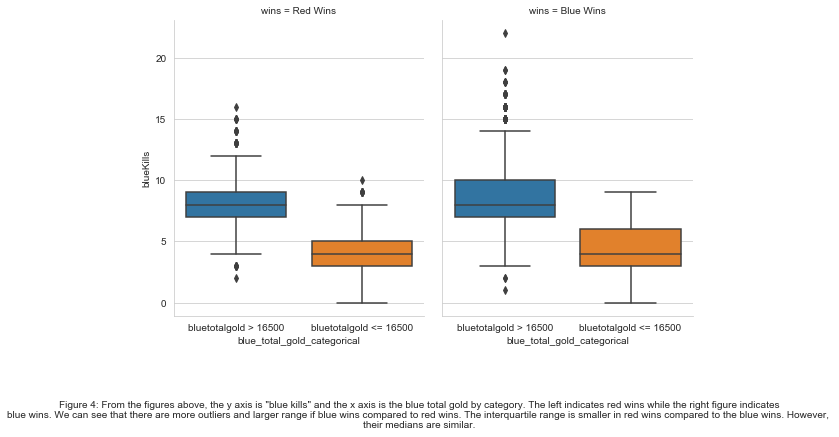

In [33]:
import seaborn as sns
g = sns.catplot(x='blue_total_gold_categorical', y='blueKills', col="wins", data=df, height=5, aspect=.8, kind = "box")

txt = '''Figure 4: From the figures above, the y axis is "blue kills" and the x axis is the blue total gold by category. The left indicates red wins while the right figure indicates
blue wins. We can see that there are more outliers and larger range if blue wins compared to red wins. The interquartile range is smaller in red wins compared to the blue wins. However, 
their medians are similar.'''

plt.figtext(0.5, -0.20, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.savefig("../figures/Boxplot4.png", bbox_inches='tight')


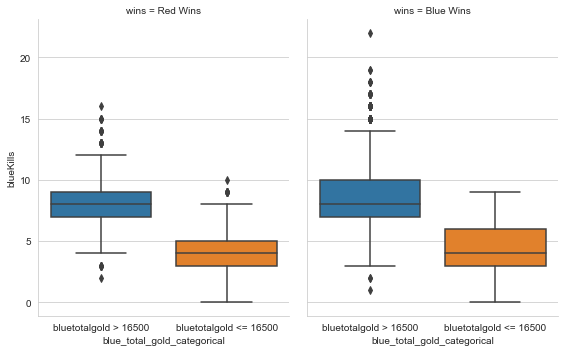

In [34]:
import seaborn as sns
g = sns.catplot(x='blue_total_gold_categorical', y='blueKills', col="wins", data=df, height=5, aspect=.8, kind = "box")

plt.savefig("../figures/Boxplot4_ppt2.png", bbox_inches='tight')

**Violin Plot: Continuous vs. Categorical**

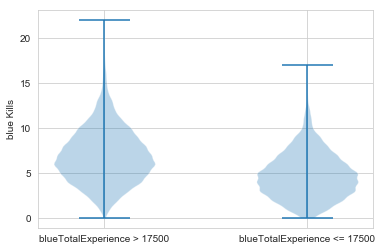

In [35]:
dataset = [df[df['blue_total_experience_categorical'] == "blueTotalExperience > 17500"]['blueKills'].values,
            df[df['blue_total_experience_categorical'] == "blueTotalExperience <= 17500"]['blueKills'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['blueTotalExperience > 17500','blueTotalExperience <= 17500'])
plt.ylabel('blue Kills')
plt.savefig("../figures/Violinplot1.png", bbox_inches='tight')

plt.show()


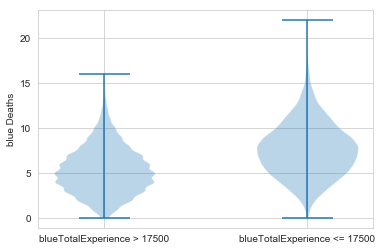

In [36]:
dataset = [df[df['blue_total_experience_categorical'] == "blueTotalExperience > 17500"]['blueDeaths'].values,
            df[df['blue_total_experience_categorical'] == "blueTotalExperience <= 17500"]['blueDeaths'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['blueTotalExperience > 17500','blueTotalExperience <= 17500'])
plt.ylabel('blue Deaths')
plt.savefig("../figures/Violinplot2.png", bbox_inches='tight')

plt.show()


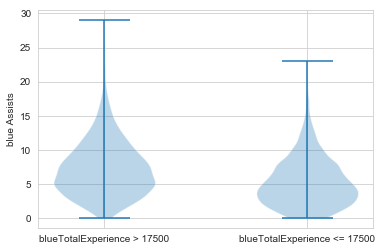

In [37]:
dataset = [df[df['blue_total_experience_categorical'] == "blueTotalExperience > 17500"]['blueAssists'].values,
            df[df['blue_total_experience_categorical'] == "blueTotalExperience <= 17500"]['blueAssists'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['blueTotalExperience > 17500','blueTotalExperience <= 17500'])
plt.ylabel('blue Assists')
plt.savefig("../figures/Violinplot3.png", bbox_inches='tight')

plt.show()


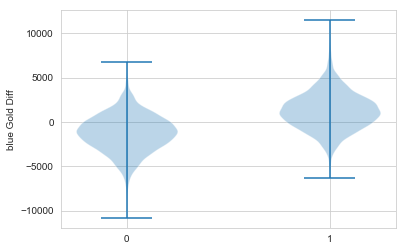

In [38]:
dataset = [df[df['blueWins'] == 0]['blueGoldDiff'].values,
           df[df['blueWins'] == 1]['blueGoldDiff'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],[0,1])
plt.ylabel('blue Gold Diff')
plt.savefig("../figures/Violinplot4.png", bbox_inches='tight')

plt.show()


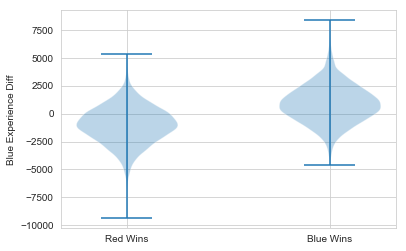

In [39]:
dataset = [df[df['blueWins'] == 0]['blueExperienceDiff'].values,
           df[df['blueWins'] == 1]['blueExperienceDiff'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],["Red Wins","Blue Wins"])
plt.ylabel('Blue Experience Diff')
plt.savefig("../figures/Violinplot5.png", bbox_inches='tight')

plt.show()


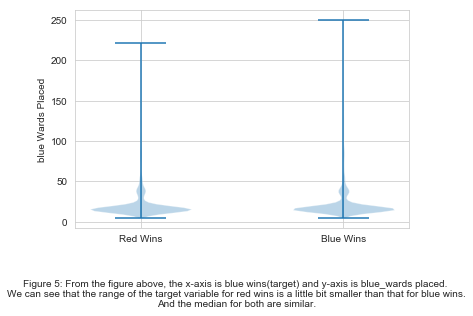

In [40]:
dataset = [df[df['blueWins'] == 0]['blueWardsPlaced'].values,
           df[df['blueWins'] == 1]['blueWardsPlaced'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],["Red Wins","Blue Wins"])
plt.ylabel('blue Wards Placed')
txt = '''Figure 5: From the figure above, the x-axis is blue wins(target) and y-axis is blue_wards placed. 
We can see that the range of the target variable for red wins is a little bit smaller than that for blue wins.
And the median for both are similar.'''
plt.figtext(0.5, -0.15, txt, wrap = True, horizontalalignment = 'center', fontsize = 10)
plt.savefig("../figures/Violinplot5.png", bbox_inches='tight')

plt.show()



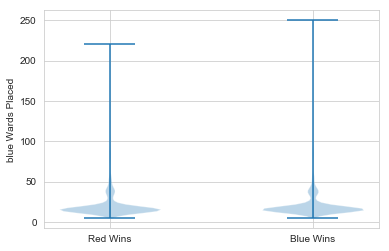

In [41]:
dataset = [df[df['blueWins'] == 0]['blueWardsPlaced'].values,
           df[df['blueWins'] == 1]['blueWardsPlaced'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],["Red Wins","Blue Wins"])
plt.ylabel('blue Wards Placed')
plt.savefig("../figures/Violinplotppt_ppt_3a.png", bbox_inches='tight')
plt.show()

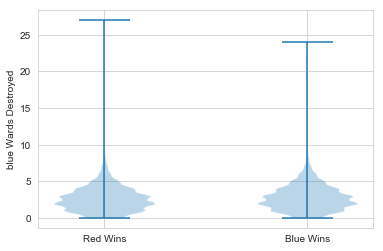

In [42]:
dataset = [df[df['blueWins'] == 0]['blueWardsDestroyed'].values,
           df[df['blueWins'] == 1]['blueWardsDestroyed'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],["Red Wins","Blue Wins"])
plt.ylabel('blue Wards Destroyed')
plt.savefig("../figures/Violinplot_ppt_3b.png", bbox_inches='tight')

plt.show()

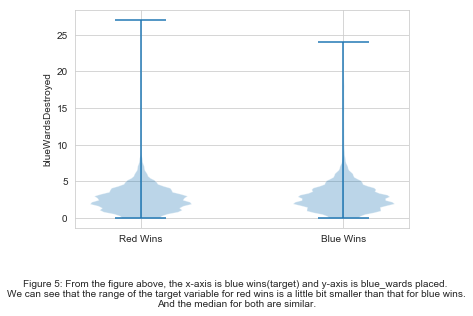

In [43]:
dataset = [df[df['blueWins'] == 0]['blueWardsDestroyed'].values,
           df[df['blueWins'] == 1]['blueWardsDestroyed'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],["Red Wins","Blue Wins"])
plt.ylabel('blueWardsDestroyed')
txt = '''Figure 5: From the figure above, the x-axis is blue wins(target) and y-axis is blue_wards placed. 
We can see that the range of the target variable for red wins is a little bit smaller than that for blue wins.
And the median for both are similar.'''
plt.figtext(0.5, -0.15, txt, wrap = True, horizontalalignment = 'center', fontsize = 10)
plt.savefig("../figures/Violinplot6.png", bbox_inches='tight')

plt.show()

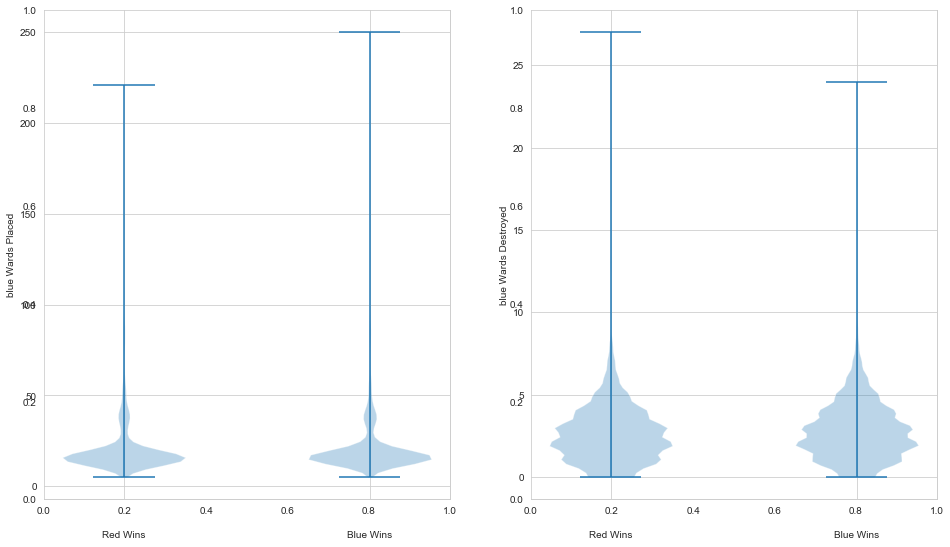

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
dataset1 = [df[df['blueWins'] == 0]['blueWardsPlaced'].values,
           df[df['blueWins'] == 1]['blueWardsPlaced'].values]
dataset2 = [df[df['blueWins'] == 0]['blueWardsDestroyed'].values,
           df[df['blueWins'] == 1]['blueWardsDestroyed'].values]
ax1.violinplot(dataset1)
ax1.set_xticks([1,2])
ax1.set_xticklabels(["Red Wins","Blue Wins"],y=-0.05)
ax1.set_ylabel('blue Wards Placed')

ax2.violinplot(dataset2)
ax2.set_xticks([1,2])
ax2.set_xticklabels(["Red Wins","Blue Wins"], y=-0.05)
ax2.set_ylabel('blue Wards Destroyed')
plt.savefig("../figures/Violinplot7.png", bbox_inches='tight')

plt.show()

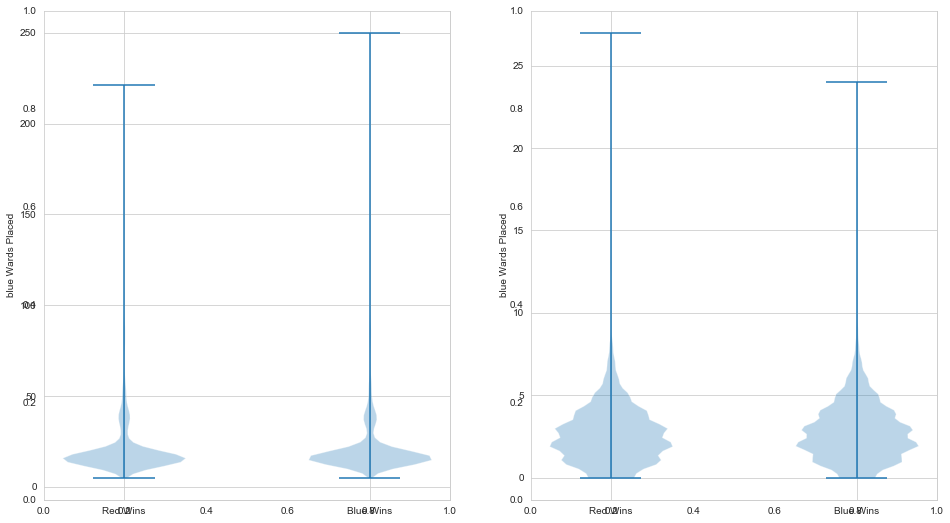

In [45]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
dataset1 = [df[df['blueWins'] == 0]['blueWardsPlaced'].values,
           df[df['blueWins'] == 1]['blueWardsPlaced'].values]
dataset2 = [df[df['blueWins'] == 0]['blueWardsDestroyed'].values,
           df[df['blueWins'] == 1]['blueWardsDestroyed'].values]
ax1.violinplot(dataset1)
ax1.set_xticks([1,2])
ax1.set_xticklabels(["Red Wins","Blue Wins"])
ax1.set_ylabel('blue Wards Placed')

ax2.violinplot(dataset2)
ax2.set_xticks([1,2])
ax2.set_xticklabels(["Red Wins","Blue Wins"])
ax2.set_ylabel('blue Wards Placed')
plt.show()

**Scatter Matrix**

In [46]:
scatter = ['blueWardsPlaced',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled']
df[continuous[0:10]]
continuous[0:13]

['blueWardsPlaced',
 'blueWardsDestroyed',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff']

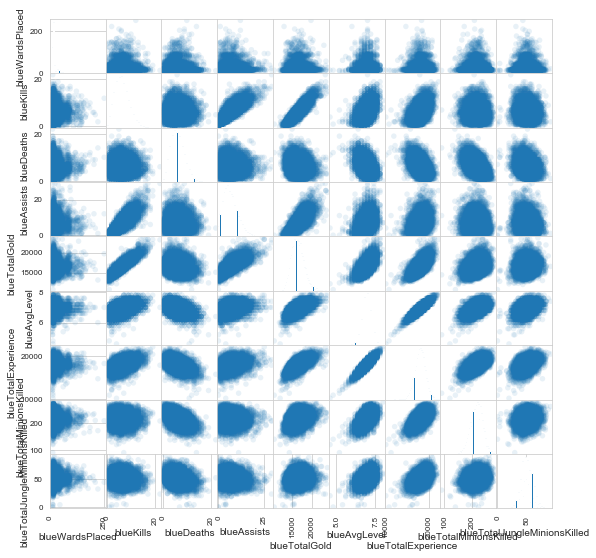

In [47]:
pd.plotting.scatter_matrix(df[scatter], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.savefig("../figures/scatter matrix.png", bbox_inches='tight')

plt.show()


## 3. Data Preprocessing

**Q1: Is the dataset IID or not? Why?**


$Ans:$ This dataset is independent and identically distributed since each random variable has the same probability distribution as the others and all are mutually independent. In addition, all samples stem from the same generative process and share the same features. And the generative process is assumed to have no memory of past generated sample.

**Q2: Please decide what fraction of points will be in each set and explain your decision in a paragraph or two.**

$Ans:$ Since this dataset only has 9879 samples which means large datasets. I will split the dataset into other dataset and test dataset with the ratio of 9: 1 and split other dataset into train and validation datasets with the ratio of 9:1. Therefore, 81% of points are in the training dataset, 9% of points are in the validation dataset, and 10% of points are in the testing dataset. 

In [7]:
print(categorical, continuous)

['blueWins', 'blueFirstBlood', 'blueEliteMonsters', 'blueHeralds', 'blueDragons', 'redFirstBlood', 'redEliteMonsters', 'redHeralds', 'redDragons'] ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']


In [8]:
print(continuous)
for i in categorical:
    print(df[i].value_counts())

['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
0    4949
1    4930
Name: blueWins, dtype: int64
1    4987
0    4892
Name: blueFirstBlood, dtype: int64
0    5156
1    4013
2     710
Name: blueEliteMonsters, dtype: int64
0    8022
1    1857
Name: blueHeralds, dtype: int64
0    6303
1    3576
Name: blueDragons, dtype: int64
0    4987
1    4892
Name: redFirstBlood, dtype: int64
0    4947
1    4202
2     730
Name: redEliteMonsters, dtype: int64
0    8298
1    1581
Name: redHera

**Q3: Does it have group structure?**

$Ans:$ No, it does not have group structure.

**Q4: Is it a time series data?**

$Ans$: No, it's not a time serires data.

In [9]:
df = pd.read_csv("../data/high_diamond_ranked_10min.csv")
df = df.iloc[:,1:]
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


**Target Variable and Unprocessed Feature Matrix:**

In [10]:
y = df['blueWins']
print("The target variable is: ", y.shape)
X = df.values
print("The unprrocessed feature matrix is: ", X.shape)
df.drop(columns = ['blueWins'], inplace = True)
ftrs = df.columns
print("The feature names are: ", ftrs, "with the shape of ", ftrs.shape)

The target variable is:  (9879,)
The unprrocessed feature matrix is:  (9879, 39)
The feature names are:  Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object') with the shape of  (38,)


**Check Whether the data is balanced:**

In [11]:
print(y.value_counts())
print(df.shape)
baseline_accuracy = 4949/(4949+4930)
print(baseline_accuracy)

0    4949
1    4930
Name: blueWins, dtype: int64
(9879, 38)
0.5009616357930965


In [12]:
categorical

['blueWins',
 'blueFirstBlood',
 'blueEliteMonsters',
 'blueHeralds',
 'blueDragons',
 'redFirstBlood',
 'redEliteMonsters',
 'redHeralds',
 'redDragons']

**Checking Missing Values**

In [13]:
per_missing_per_ftr = df.isnull().sum(axis = 0)/df.shape[0]
print("fraction of missing values in features:")
print(per_missing_per_ftr[per_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[per_missing_per_ftr[per_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


**After checking that, we found that there is no missing values. Therefore, there is no need to handle missing values.**

**Work with the diabetes dataset and try different ML algorithms on it to figure out which one is the best.**

In [14]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
a = df['blueKills']
print(a.value_counts())
trn = pd.DataFrame(a)
scaler = StandardScaler()
scaler.fit(trn)
print(scaler.transform(trn)[:10])

6     1322
5     1302
4     1186
7     1138
8      942
3      917
9      717
2      609
10     527
11     340
1      313
12     204
13     147
14      64
0       63
15      38
16      30
17      13
18       4
19       2
22       1
Name: blueKills, dtype: int64
[[ 0.93530086]
 [-0.39321635]
 [ 0.27104225]
 [-0.72534565]
 [-0.06108705]
 [-0.39321635]
 [ 0.27104225]
 [-0.39321635]
 [ 0.27104225]
 [-0.72534565]]


**Create Data Preprocessors**

In [15]:
# onehot_ftrs = ['blueFirstBlood','redFirstBlood','blueHeralds','redHeralds','redDragons',
#                   'blueDragons']
minmax_ftrs = ['blueTowersDestroyed','redTowersDestroyed', 'blueEliteMonsters', 'redEliteMonsters']

std_ftrs = ['blueAvgLevel','redAvgLevel','blueWardsPlaced','blueWardsDestroyed','blueKills','blueDeaths','blueAssists',
                 'blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled','blueCSPerMin',
                'redWardsPlaced','redWardsDestroyed','redKills','redDeaths','redAssists','redTotalExperience',
                'redTotalMinionsKilled','redTotalJungleMinionsKilled','redCSPerMin','blueTotalGold', 'blueGoldDiff', 
              'blueExperienceDiff', 'blueGoldPerMin','redTotalGold', 'redGoldDiff', 'redExperienceDiff','redGoldPerMin']

cont_ftrs = minmax_ftrs + std_ftrs
cat_ftrs = ['blueFirstBlood','redFirstBlood','blueHeralds','redHeralds','redDragons', 'blueDragons']

total_ftrs = cont_ftrs + cat_ftrs
print(len(total_ftrs))
[i for i in df.columns if i not in total_ftrs]

38


[]

**Make a pipeline**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score


def ML_pipeline_kfold_GridSearchCV(X, y, random_state, ML_algo, param_grid):
    
    # Splitting Strategy
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    kf = KFold(n_splits = 5, shuffle = True, random_state = random_state)
    
    # Create the pipeline: preprocessor + supervised ML method
    minmax_ftrs = ['blueTowersDestroyed','redTowersDestroyed', 'blueEliteMonsters', 'redEliteMonsters']
    std_ftrs = ['blueAvgLevel','redAvgLevel','blueWardsPlaced','blueWardsDestroyed','blueKills','blueDeaths','blueAssists',
                 'blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled','blueCSPerMin',
                'redWardsPlaced','redWardsDestroyed','redKills','redDeaths','redAssists','redTotalExperience',
                'redTotalMinionsKilled','redTotalJungleMinionsKilled','redCSPerMin','blueTotalGold', 'blueGoldDiff', 
                'blueExperienceDiff', 'blueGoldPerMin','redTotalGold', 'redGoldDiff', 'redExperienceDiff','redGoldPerMin']
    
    cat_ftrs = ['blueFirstBlood','redFirstBlood','blueHeralds','redHeralds','redDragons', 'blueDragons']
    cont_ftrs = minmax_ftrs + std_ftrs
    
    # one-hot encoder
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, cont_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    
    # Preprocess the data
    pipe = make_pipeline(preprocessor, ML_algo)
    grid = GridSearchCV(pipe, param_grid = param_grid, scoring = make_scorer(accuracy_score), 
                        cv = kf, return_train_score = True)
    
    # do kfold CV on X_other
    grid.fit(X_other, y_other)
    
#     feature_names = cont_ftrs + \
#                 list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
#     print(feature_names)
#     return grid, np.array(feature_names), grid.score(X_test, y_test)
    return grid, grid.score(X_test, y_test)

**Logitstic Regreession with l1 regularization**

In [17]:
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [18]:
import numpy as np
df1 = pd.read_csv("../data/high_diamond_ranked_10min.csv")
X = df1.loc[:,df1.columns!='blueWins']
X = X.iloc[:,1:]
y = df1.loc[:,df1.columns =='blueWins']
# ML_algo = LogisticRegression(penalty='l2',solver='lbfgs')
ML_algo = LogisticRegression()
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10,100],
              'logisticregression__penalty': ['l1'],
              'logisticregression__solver': ['liblinear','saga']}
test_scores_l1 = []
for i in range(5):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,12*i,ML_algo, param_grid)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores_l1.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores_l1),2),'+/-',np.around(np.std(test_scores_l1),2))

{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
best CV score: 0.7346594448314238
test score: 0.7252024291497976
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
best CV score: 0.7333936220466136
test score: 0.729251012145749
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
best CV score: 0.7328873729973818
test score: 0.729251012145749
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
best CV score: 0.7328868926092282
test score: 0.7322874493927125
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
best CV score: 0.7342776163139817
test score: 0.7236842105263158
test accuracy: 0.73 +/- 0.0


**Logitstic Regreession with l2 regularization**

In [19]:
from sklearn.preprocessing import OneHotEncoder
df1 = pd.read_csv("../data/high_diamond_ranked_10min.csv")
X = df1.loc[:,df1.columns!='blueWins']
X = X.iloc[:,1:]
y = df1.loc[:,df1.columns =='blueWins']
# ML_algo = LogisticRegression(penalty='l2',solver='lbfgs')
ML_algo = LogisticRegression()
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10,100],
              'logisticregression__penalty': ['l2'],
              'logisticregression__solver': ['liblinear','saga','lbfgs','sag','newton-cg']}
test_scores_l2 = []
for i in range(5):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,12*i,ML_algo, param_grid)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores_l2.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores_l2),2),'+/-',np.around(np.std(test_scores_l2),2))

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
best CV score: 0.7345332628764042
test score: 0.7196356275303644
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
best CV score: 0.7330149160521702
test score: 0.7302631578947368
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
best CV score: 0.7306088919847237
test score: 0.7343117408906883
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
best CV score: 0.7317454903562078
test score: 0.7327935222672065
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
best CV score: 0.7335194837428642
test score: 0.7262145748987854
test accuracy: 0.73 +/- 0.01


**Logitstic Regreession with Elastic Net**

In [20]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
df1 = pd.read_csv("../data/high_diamond_ranked_10min.csv")
X = df1.loc[:,df1.columns!='blueWins']
X = X.iloc[:,1:]
y = df1.loc[:,df1.columns =='blueWins']

ML_algo = LogisticRegression(penalty = 'elasticnet',solver = 'saga')
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10,100],
              'logisticregression__l1_ratio': np.linspace(1e-1, 1, 10)}
test_scores_en = []
for i in range(5):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,12*i,ML_algo, param_grid)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores_en.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores_en),2),'+/-',np.around(np.std(test_scores_en),2))

{'logisticregression__C': 0.01, 'logisticregression__l1_ratio': 0.30000000000000004}
best CV score: 0.7346603255430388
test score: 0.72165991902834
{'logisticregression__C': 0.01, 'logisticregression__l1_ratio': 0.5}
best CV score: 0.7340267736330955
test score: 0.7338056680161943
{'logisticregression__C': 0.01, 'logisticregression__l1_ratio': 0.6}
best CV score: 0.734025732792096
test score: 0.7317813765182186
{'logisticregression__C': 0.01, 'logisticregression__l1_ratio': 0.5}
best CV score: 0.7355428786459459
test score: 0.729757085020243
{'logisticregression__C': 0.01, 'logisticregression__l1_ratio': 0.5}
best CV score: 0.7359227856107735
test score: 0.7236842105263158
test accuracy: 0.73 +/- 0.0


**Random Forest**

In [21]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [22]:
from sklearn.ensemble import RandomForestClassifier

df1 = pd.read_csv("../data/high_diamond_ranked_10min.csv")
X = df1.loc[:,df1.columns!='blueWins']
X = X.iloc[:,1:]
y = df1.loc[:,df1.columns =='blueWins']

ML_algo = RandomForestClassifier(n_jobs = -1)
param_grid = {'randomforestclassifier__max_depth': [1,2,3,5,10],
                 'randomforestclassifier__max_features': [0.25, 0.5,0.75,1.0]}

test_scores_rf = []
for i in range(5):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,12*i,ML_algo, param_grid)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores_rf.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores_rf),2),'+/-',np.around(np.std(test_scores_rf),2))

{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.75}
best CV score: 0.733394022370075
test score: 0.7176113360323887
{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.5}
best CV score: 0.7292185686034316
test score: 0.729251012145749
{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.25}
best CV score: 0.7295974347272596
test score: 0.7267206477732794
{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 1.0}
best CV score: 0.7306080112731086
test score: 0.7226720647773279
{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.25}
best CV score: 0.7308602150537633
test score: 0.7196356275303644
test accuracy: 0.72 +/- 0.0


**KNeighborsClassifier**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

df1 = pd.read_csv("../data/high_diamond_ranked_10min.csv")
X = df1.loc[:,df1.columns!='blueWins']
X = X.iloc[:,1:]
y = df1.loc[:,df1.columns =='blueWins']

ML_algo = KNeighborsClassifier()
param_grid = {'kneighborsclassifier__n_neighbors': [1,10,30,50,100],
            'kneighborsclassifier__weights': ['uniform','distance']}

test_scores_knn = []
for i in range(5):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,12*i,ML_algo, param_grid)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores_knn.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores_knn),2),'+/-',np.around(np.std(test_scores_knn),2))

{'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'distance'}
best CV score: 0.7269420091433878
test score: 0.7140688259109311
{'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'distance'}
best CV score: 0.7230181987045532
test score: 0.7241902834008097
{'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'uniform'}
best CV score: 0.7232701622911312
test score: 0.7262145748987854
{'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'uniform'}
best CV score: 0.725546481557098
test score: 0.7155870445344129
{'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'uniform'}
best CV score: 0.7263068559395991
test score: 0.7125506072874493
test accuracy: 0.72 +/- 0.01


**Decision Tree**

In [24]:
from sklearn.tree import DecisionTreeClassifier
df1 = pd.read_csv("../data/high_diamond_ranked_10min.csv")
X = df1.loc[:,df1.columns!='blueWins']K
X = X.iloc[:,1:]
y = df1.loc[:,df1.columns =='blueWins']

ML_algo = DecisionTreeClassifier()
param_grid = {'decisiontreeclassifier__max_depth': [1,2,3,5,10,50,100],
                 'decisiontreeclassifier__max_features': [0.1, 0.25, 0.5,0.75,1.0]}

test_scores_dt = []
for i in range(5):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,12*i,ML_algo, param_grid)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores_dt.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores_dt),2),'+/-',np.around(np.std(test_scores_dt),2))

{'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__max_features': 0.75}
best CV score: 0.7246645689717292
test score: 0.7115384615384616
{'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__max_features': 1.0}
best CV score: 0.724789309762288
test score: 0.7191295546558705
{'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__max_features': 1.0}
best CV score: 0.7192196895091234
test score: 0.7327935222672065
{'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__max_features': 0.75}
best CV score: 0.7231427793657275
test score: 0.72165991902834
{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_features': 0.25}
best CV score: 0.7240266935684032
test score: 0.7054655870445344
test accuracy: 0.72 +/- 0.01


**Summary:**

In [42]:
res = {"Baseline": baseline_accuracy,  
      "Logistic Regression with L2 Regularization": str(np.around(np.mean(test_scores_l2),5)) + '+/-'+ str(np.around(np.std(test_scores_l2),5)),
      "Logistic Regression with Elasticnet": str(np.around(np.mean(test_scores_en),5)) + '+/-' + str(np.around(np.std(test_scores_en),5)),
       "Logistic Regression with L1 Regularization": str(np.around(np.mean(test_scores_l1),5)) + '+/-'+ str(np.around(np.std(test_scores_l1),5)),
       "Random Forest": str(np.around(np.mean(test_scores_rf),5)) + '+/-'+ str(np.around(np.std(test_scores_rf),5)),
      "KNN": str(np.around(np.mean(test_scores_knn),5)) + '+/-'+ str(np.around(np.std(test_scores_knn),5)),
      "Decision Tree": str(np.around(np.mean(test_scores_dt),5)) + '+/-'+ str(np.around(np.std(test_scores_dt),5))}
pd.DataFrame.from_dict(res, orient = 'index', columns = ['Accuracy'])

,Accuracy
Baseline,0.500962
Logistic Regression with L2 Regularization,0.72864+/-0.00527
Logistic Regression with Elasticnet,0.72814+/-0.00469
Logistic Regression with L1 Regularization,0.72794+/-0.0031
Random Forest,0.72318+/-0.00432
KNN,0.71852+/-0.00558
Decision Tree,0.71812+/-0.0093


**The number of std above the baseline model**

In [53]:
(np.mean(test_scores_l2) - baseline_accuracy)/np.std(test_scores_l2)

43.179826222801516

**Uncertainty for Splitting**

In [50]:
random_state = 42
for i in range(1):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state*i)
    kf = KFold(n_splits = 5, shuffle = True, random_state = random_state)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
        print("Spiltting at ", i)
        print("train balance:")
        print(y_train['blueWins'].value_counts(normalize = True))
        print("validation balance:")
        print(y_val['blueWins'].value_counts(normalize = True))
        print('test balance:')
        print(y_test['blueWins'].value_counts(normalize=True))

Spiltting at  0
train balance:
0    0.500633
1    0.499367
Name: blueWins, dtype: float64
validation balance:
1    0.503479
0    0.496521
Name: blueWins, dtype: float64
test balance:
0    0.505567
1    0.494433
Name: blueWins, dtype: float64
Spiltting at  0
train balance:
0    0.502373
1    0.497627
Name: blueWins, dtype: float64
validation balance:
1    0.510436
0    0.489564
Name: blueWins, dtype: float64
test balance:
0    0.505567
1    0.494433
Name: blueWins, dtype: float64
Spiltting at  0
train balance:
0    0.501265
1    0.498735
Name: blueWins, dtype: float64
validation balance:
1    0.506009
0    0.493991
Name: blueWins, dtype: float64
test balance:
0    0.505567
1    0.494433
Name: blueWins, dtype: float64
Spiltting at  0
train balance:
1    0.504824
0    0.495176
Name: blueWins, dtype: float64
validation balance:
0    0.518354
1    0.481646
Name: blueWins, dtype: float64
test balance:
0    0.505567
1    0.494433
Name: blueWins, dtype: float64
Spiltting at  0
train balance:
1

In [104]:
random_state = 12
for i in range(1):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state*i)
    kf = KFold(n_splits = 5, shuffle = True, random_state = random_state)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
        minmax_ftrs = ['blueTowersDestroyed','redTowersDestroyed', 'blueEliteMonsters', 'redEliteMonsters']
        std_ftrs = ['blueAvgLevel','redAvgLevel','blueWardsPlaced','blueWardsDestroyed','blueKills','blueDeaths','blueAssists',
                 'blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled','blueCSPerMin',
                'redWardsPlaced','redWardsDestroyed','redKills','redDeaths','redAssists','redTotalExperience',
                'redTotalMinionsKilled','redTotalJungleMinionsKilled','redCSPerMin','blueTotalGold', 'blueGoldDiff', 
                'blueExperienceDiff', 'blueGoldPerMin','redTotalGold', 'redGoldDiff', 'redExperienceDiff','redGoldPerMin']
    
        cat_ftrs = ['blueFirstBlood','redFirstBlood','blueHeralds','redHeralds','redDragons', 'blueDragons']
        cont_ftrs = minmax_ftrs + std_ftrs
    
        # one-hot encoder
        preprocessor = ColumnTransformer(transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), cat_ftrs),
        ('std', StandardScaler(), cont_ftrs)])
        clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

        X_train_prep = clf.fit_transform(X_train)
        X_val_prep = clf.transform(X_val)
        X_test_prep = clf.transform(X_test)

        
        
        print(y_train.shape, y_val.shape, y_test.shape)
        print('   training set:',X_train_prep.shape, y_train.shape) 
        print('   validation set:',X_val_prep.shape, y_val.shape) 
        print('   testing set:',X_test_prep.shape, y_test.shape) 
        
        print("Spiltting at ", i)
        print("train balance:")
        print(y_train['blueWins'].value_counts(normalize = True))
        print("validation balance:")
        print(y_val['blueWins'].value_counts(normalize = True))
        print('test balance:')
        print(y_test['blueWins'].value_counts(normalize=True))

(6322, 1) (1581, 1) (1976, 1)
   training set: (6322, 44) (6322, 1)
   validation set: (1581, 44) (1581, 1)
   testing set: (1976, 44) (1976, 1)
Spiltting at  0
train balance:
0    0.503164
1    0.496836
Name: blueWins, dtype: float64
validation balance:
1    0.513599
0    0.486401
Name: blueWins, dtype: float64
test balance:
0    0.505567
1    0.494433
Name: blueWins, dtype: float64
(6322, 1) (1581, 1) (1976, 1)
   training set: (6322, 44) (6322, 1)
   validation set: (1581, 44) (1581, 1)
   testing set: (1976, 44) (1976, 1)
Spiltting at  0
train balance:
0    0.504587
1    0.495413
Name: blueWins, dtype: float64
validation balance:
1    0.519292
0    0.480708
Name: blueWins, dtype: float64
test balance:
0    0.505567
1    0.494433
Name: blueWins, dtype: float64
(6322, 1) (1581, 1) (1976, 1)
   training set: (6322, 44) (6322, 1)
   validation set: (1581, 44) (1581, 1)
   testing set: (1976, 44) (1976, 1)
Spiltting at  0
train balance:
1    0.502689
0    0.497311
Name: blueWins, dtype:

## 4. Global Feature Importance

In [26]:
df1 = pd.read_csv("../data/high_diamond_ranked_10min.csv")
X = df1.loc[:,df1.columns!='blueWins']
X = X.iloc[:,1:]
y = df1.loc[:,df1.columns =='blueWins']
ftr_names = X.columns
print(X.head())
print(y)

   blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  \
0               28                   2               1          9           6   
1               12                   1               0          5           5   
2               15                   0               0          7          11   
3               43                   1               0          4           5   
4               75                   4               0          6           6   

   blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           11                  0            0            0   
1            5                  0            0            0   
2            4                  1            1            0   
3            5                  1            0            1   
4            6                  0            0            0   

   blueTowersDestroyed  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
0                    0  ...                   0         

In [27]:
def ML_pipeline_kfold(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    minmax_ftrs = ['blueTowersDestroyed','redTowersDestroyed', 'blueEliteMonsters', 'redEliteMonsters']
    std_ftrs = ['blueAvgLevel','redAvgLevel','blueWardsPlaced','blueWardsDestroyed','blueKills','blueDeaths','blueAssists',
                 'blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled','blueCSPerMin',
                'redWardsPlaced','redWardsDestroyed','redKills','redDeaths','redAssists','redTotalExperience',
                'redTotalMinionsKilled','redTotalJungleMinionsKilled','redCSPerMin','blueTotalGold', 'blueGoldDiff', 
                'blueExperienceDiff', 'blueGoldPerMin','redTotalGold', 'redGoldDiff', 'redExperienceDiff','redGoldPerMin']
    
    cat_ftrs = ['blueFirstBlood','redFirstBlood','blueHeralds','redHeralds','redDragons', 'blueDragons']
    cont_ftrs = minmax_ftrs + std_ftrs
    # one-hot encoder
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, cont_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    
#     pipe = make_pipeline(preprocessor,LogisticRegression())
    # the parameter(s) we want to tune
#     param_grid = {'logisticregression__C': [1],
#               'logisticregression__penalty': ['l2'],
#               'logisticregression__solver': ['liblinear']}
    
    pipe = make_pipeline(preprocessor,LogisticRegression(penalty = 'elasticnet',solver = 'saga'))
    param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10,100],
              'logisticregression__l1_ratio': np.linspace(1e-1, 1, 10)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=10)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, X_test, y_test

In [28]:
grid, X_test, y_test = ML_pipeline_kfold(X,y,42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save the output so I can use it later
import pickle
file = open('../results/grid.save', 'wb')
pickle.dump((grid,X_test,y_test),file)
file.close()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

0.7352915555769062
0.7322874493927125
{'logisticregression__C': 0.01, 'logisticregression__l1_ratio': 0.30000000000000004}


In [54]:
import pickle
file = open('../results/grid.save', 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),5))
    scores[i] = acc_scores

test score =  0.7322874493927125
test baseline =  blueWins    0.49747
dtype: float64
shuffling blueWardsPlaced
   shuffled test score: 0.732 +/- 0.0
shuffling blueWardsDestroyed
   shuffled test score: 0.732 +/- 0.0
shuffling blueFirstBlood
   shuffled test score: 0.733 +/- 0.00086
shuffling blueKills
   shuffled test score: 0.733 +/- 0.00057
shuffling blueDeaths
   shuffled test score: 0.732 +/- 0.00244
shuffling blueAssists
   shuffled test score: 0.732 +/- 0.0
shuffling blueEliteMonsters
   shuffled test score: 0.731 +/- 0.00283
shuffling blueDragons
   shuffled test score: 0.732 +/- 0.00191
shuffling blueHeralds
   shuffled test score: 0.732 +/- 0.0
shuffling blueTowersDestroyed
   shuffled test score: 0.732 +/- 0.0
shuffling blueTotalGold
   shuffled test score: 0.727 +/- 0.00469
shuffling blueAvgLevel
   shuffled test score: 0.732 +/- 0.0
shuffling blueTotalExperience
   shuffled test score: 0.731 +/- 0.00118
shuffling blueTotalMinionsKilled
   shuffled test score: 0.732 +/- 0.0


test score: 0.7322874493927125


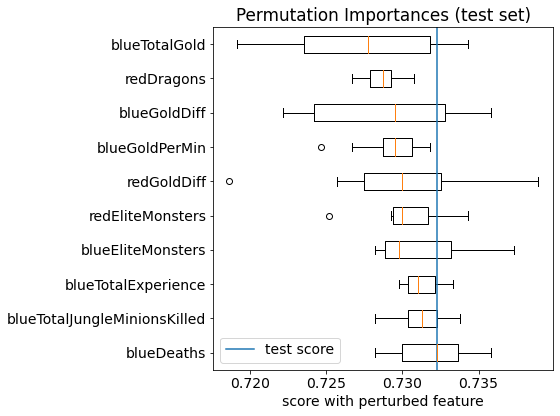

In [91]:
import matplotlib.pyplot as plt
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1]
print("test score:", test_score)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

test score: 0.7322874493927125


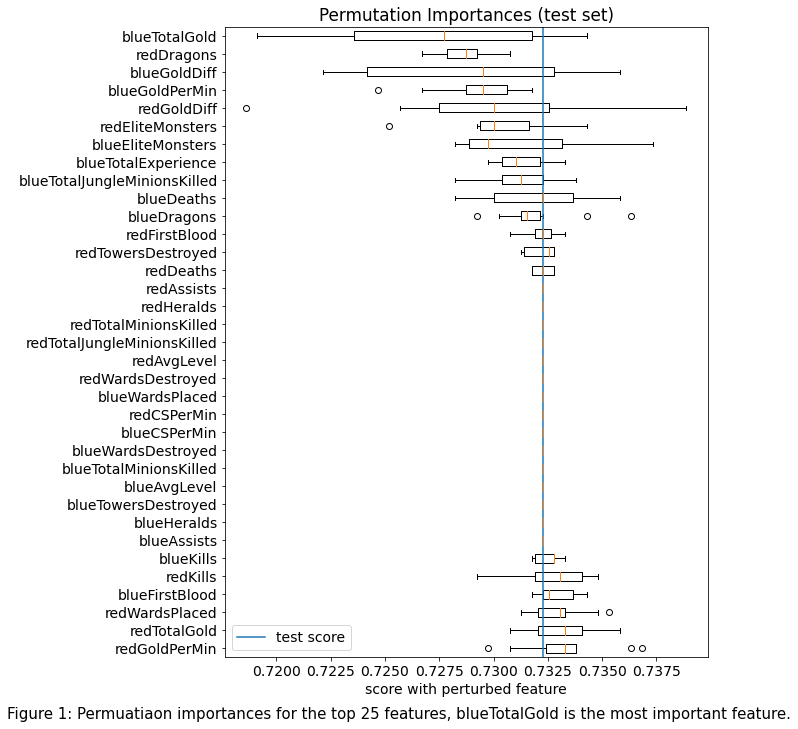

In [106]:
import matplotlib.pyplot as plt
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:35][::-1]
print("test score:", test_score)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,10))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
txt = '''Figure 1: Permuatiaon importances for the top 25 features, blueTotalGold is the most important feature.'''
plt.figtext(0.55, -0.01, txt, wrap = True, horizontalalignment = 'center', fontsize = 15)
plt.savefig("../figures/permuation_importances_1.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

test score: 0.7322874493927125
test score: 0.7322874493927125


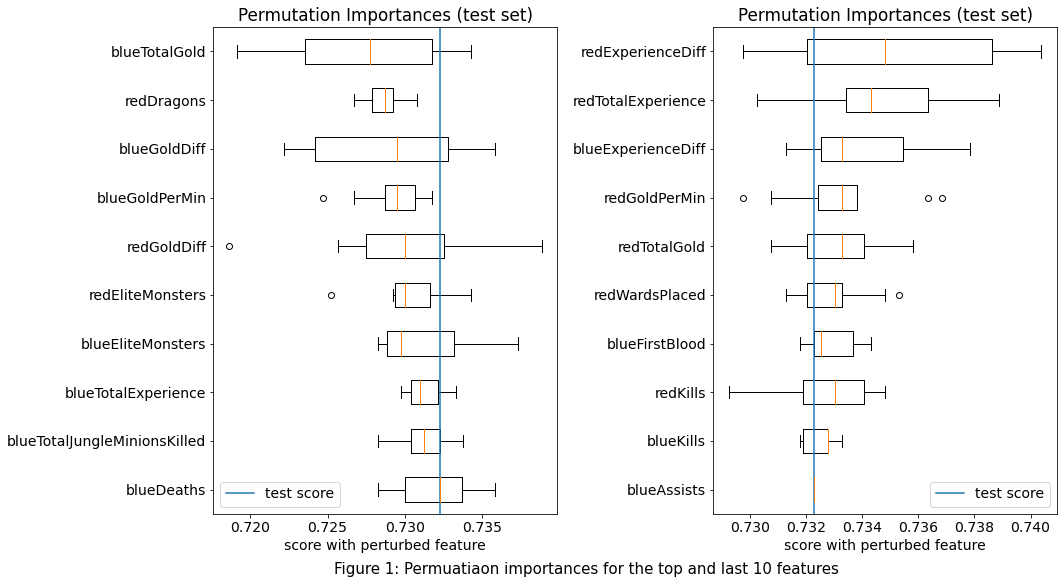

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.rcParams.update({'font.size': 14})

plt.subplot(1,2,1)
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1]
print("test score:", test_score)
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()

plt.subplot(1,2,2)
sorted_indcs1 = np.argsort(np.mean(scores,axis=1))[-10:]
print("test score:", test_score)
plt.rcParams.update({'font.size': 14})
plt.boxplot(scores[sorted_indcs1].T,labels=ftr_names[sorted_indcs1],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()

txt = '''Figure 1: Permuatiaon importances for the top and last 10 features'''
plt.figtext(0.55, -0.01, txt, wrap = True, horizontalalignment = 'center', fontsize = 15)
plt.savefig("../figures/permuation_importances.png", bbox_inches='tight')

plt.tight_layout()
plt.show()

test score: 0.7322874493927125


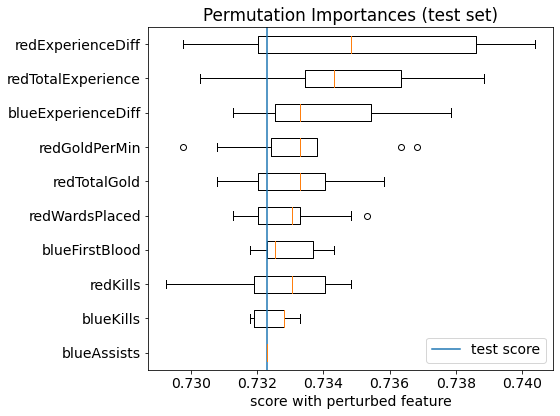

In [56]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[-10:]
print("test score:", test_score)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
def ML_pipeline_kfold(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    minmax_ftrs = ['blueTowersDestroyed','redTowersDestroyed', 'blueEliteMonsters', 'redEliteMonsters']
    std_ftrs = ['blueAvgLevel','redAvgLevel','blueWardsPlaced','blueWardsDestroyed','blueKills','blueDeaths','blueAssists',
                 'blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled','blueCSPerMin',
                'redWardsPlaced','redWardsDestroyed','redKills','redDeaths','redAssists','redTotalExperience',
                'redTotalMinionsKilled','redTotalJungleMinionsKilled','redCSPerMin','blueTotalGold', 'blueGoldDiff', 
                'blueExperienceDiff', 'blueGoldPerMin','redTotalGold', 'redGoldDiff', 'redExperienceDiff','redGoldPerMin']
    
    cat_ftrs = ['blueFirstBlood','redFirstBlood','blueHeralds','redHeralds','redDragons', 'blueDragons']
    cont_ftrs = minmax_ftrs + std_ftrs
    # one-hot encoder
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, cont_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    
#     pipe = make_pipeline(preprocessor,LogisticRegression())
    # the parameter(s) we want to tune
#     param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10,100],
#               'logisticregression__penalty': ['l2'],
#               'logisticregression__solver': ['liblinear','saga','lbfgs','sag','newton-cg']}
    pipe = make_pipeline(preprocessor,RandomForestClassifier(n_jobs = -1))
    param_grid = {'randomforestclassifier__max_depth': [1,2,3,5,10],
                 'randomforestclassifier__max_features': [0.25, 0.5,0.75,1.0]}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=10)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
    return grid, np.array(feature_names), X_test, y_test

In [57]:
grid, feature_names, X_test, y_test = ML_pipeline_kfold(X,y,12,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:   30.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.1s finished


0.7299774217567795
0.7322874493927125
{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.25}


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


(1976, 44)
(2, 1000, 44)


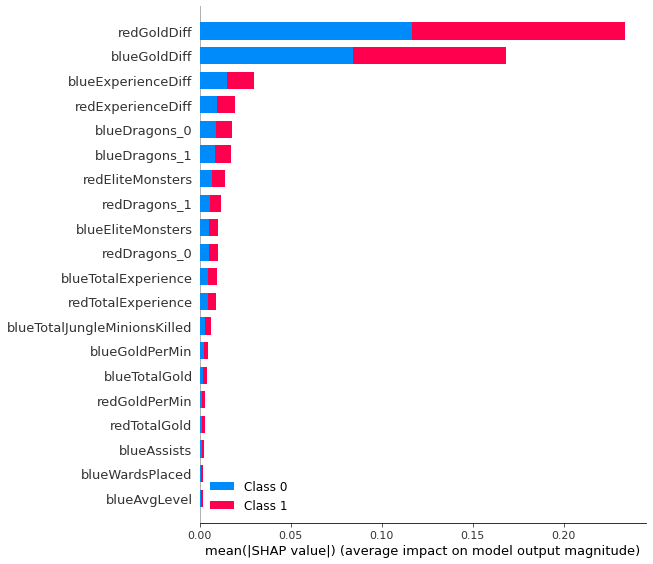

In [37]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed, feature_names = feature_names, max_display=20)

In [38]:
index = 1 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.5020258129824118


In [39]:
index = 100 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.5020258129824118


In [ ]:
index = 500 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)